In [168]:
import pandas as pd
import geopandas as gpd
import numpy as np 
from numpy import log
import gmaps 
import gmaps.datasets 
import matplotlib.pyplot as plt
import matplotlib.pyplot as set_ylim
from datetime import datetime
import shap
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

<h4>Load data</h4>

In [169]:
# import predictions data for use in the carbon zero simulation
index_pred_df = pd.read_csv('stationary-data/X_test_pred.csv')

In [170]:
index_pred_df.columns

Index(['Unnamed: 0', 'avg_kwh', 'Parcel Number', 'Heated_SquareFeet',
       'kwh_per_sqft', 'code_release'],
      dtype='object')

In [171]:
len(index_pred_df['Parcel Number'].unique())

7074

In [172]:
index_pred_df = index_pred_df.rename(columns={'code_release': 'code_release_pred'})

In [173]:
index_pred_df = index_pred_df.set_index('Parcel Number')

In [174]:
# read in electricity consumption and building data
kwh_year_df = pd.read_csv('clean-data/kwh_year.csv')

In [175]:
kwh_year_df = kwh_year_df.drop(columns='Unnamed: 0')

#### Join observed code release and predicted efficiency index dataframes

In [176]:
len(kwh_year_df['Parcel Number'].unique())

8635

In [177]:
kwh_year_df = kwh_year_df.drop_duplicates(subset=['Parcel Number'])

In [178]:
kwh_year_df = kwh_year_df.set_index('Parcel Number')

In [179]:
preds_electricity_df = index_pred_df.join(kwh_year_df, how="left", on='Parcel Number', lsuffix='_left', rsuffix='_right')
# electricity_df['preds'] = preds_electricity_df['preds']


In [180]:
preds_electricity_df = preds_electricity_df.drop(columns='Unnamed: 0')

In [181]:
preds_electricity_df = preds_electricity_df.reset_index()

<h4>How different are the predicted efficiency indexe from the code releases?</h4>

In [38]:
# address = electricity_df[['Service Address', 'preds']].groupby('Service Address')['preds'].agg('count')


In [74]:
# address_df = address.to_frame()

In [13]:
# address_df = address_df.reset_index()

In [75]:
# address_df.info()

In [76]:
# # there are 195 different counts of a prediction across 100,313 addresses  
# address_df['preds'].unique()

In [184]:
preds_electricity_df.columns

Index(['Parcel Number', 'avg_kwh_left', 'Heated_SquareFeet_left',
       'kwh_per_sqft_left', 'code_release_pred', 'Service Address',
       'avg_kwh_right', 'Latitude', 'Longitude', 'prop_id', 'Effective_YrBlt',
       'Heated_SquareFeet_right', 'Stories', 'kwh_per_sqft_right',
       'code_release'],
      dtype='object')

In [246]:
preds_electricity_df.head(100)

Parcel Number   avg_kwh_left  Heated_SquareFeet_left  kwh_per_sqft_left  \
0     10804073000    1225.220779                  1132.0           1.082351   
1     11879010000    1371.841584                  2980.0           0.460350   
2      8210003001  143973.069307                 30062.0           4.789205   
3      6020005000   44957.365079                 42506.0           1.057671   
4     15995012000    1420.455446                  1250.0           1.136364   
5      9003014111    8304.436893                  1070.0           7.761156   
6      9001001000    6296.165049                  2291.0           2.748217   
7     11120034000     443.205882                  1560.0           0.284106   
8      6532015000    1265.601942                  2557.0           0.494956   
9      6083013003     731.650485                  1255.0           0.582988   
10     6757005250     754.203883                  1177.0           0.640785   
11    10625036000    1303.084507                  1544.0           0.843967   
12    12390000000     943.850000                  1456.0           0.648249   
13    16116100014     851.712871                  1290.0           0.660243   
14     7897003001     664.495146                  1244.0           0.534160   
15     6528040000    1239.165049                  2907.0           0.426269   
16     6179003000   32189.514563                  3419.0           9.414892   
17     6071020021     460.300971                  1550.0           0.296968   
18     9009010213     522.029126                  1038.0           0.502918   
19     8007000000    2112.368932                  1356.0           1.557794   
20     9018092000     902.728155                  2164.0           0.417157   
21     6397070000     376.718447                  1209.0           0.311595   
22     7291001001     493.990291                  2335.0           0.211559   
23     9004047000    1303.012987                  1971.0           0.661092   
24     9310000000     878.816327                   976.0           0.900427   
25    16106124000    1323.673469                  1580.0           0.837768   
26     6087050069     562.174757                  2102.0           0.267448   
27     7814100087     614.989130                  1521.0           0.404332   
28     6383027023     709.339806                  2321.0           0.305618   
29     6396008000     456.912621                  1636.0           0.279286   
30     6020050048     926.155340                  1788.0           0.517984   
31     7314070001     594.298969                   975.0           0.609537   
32     6415002020     391.941748                  2682.0           0.146138   
33     8362000000     332.875000                  1363.0           0.244222   
34     6076040006    1372.524272                  1577.0           0.870339   
35     6014013058     835.135922                  1435.0           0.581976   
36     7902030058     796.504854                  1709.0           0.466065   
37     9239001000    1421.339806                  2159.0           0.658332   
38     6067010058     611.067961                  1273.0           0.480022   
39    15247001000     674.724490                  1074.0           0.628235   
40     8197007017    1813.454545                  2188.0           0.828818   
41     9564000000    1018.049020                  2277.0           0.447101   
42     6377010061     701.514563                  2446.0           0.286801   
43     6087030034    1459.941748                  2798.0           0.521780   
44     7294202327   15132.563107                  1198.0          12.631522   
45     6680020002    1037.029126                  1370.0           0.756956   
46     6023040056    1055.650485                  2195.0           0.480934   
47     6063110000     635.699029                  1378.0           0.461320   
48     6014011049     575.320388                  1378.0           0.417504   
49     6017041013     598.873786                  2253

In [274]:
preds_min_df = preds_electricity_df.drop(columns=['Service Address',
       'avg_kwh_right', 'Latitude', 'Longitude', 'prop_id', 'Effective_YrBlt',
       'Heated_SquareFeet_right', 'Stories', 'kwh_per_sqft_right'])

In [275]:
preds_min_df['pred_resid'] = preds_min_df['code_release'] - preds_min_df['code_release_pred']


Text(0, 0.5, 'Residuals pred efficiency value')

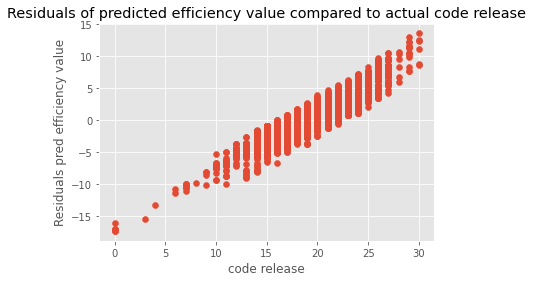

In [276]:
# plot efficiency value residual across code releases

x = preds_min_df['code_release']
y = preds_min_df['pred_resid']

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_title('Residuals of predicted efficiency value compared to actual code release')
ax.set_xlabel('code release')
ax.set_ylabel('Residuals pred efficiency value')

# ax.set_ylim([0,12000])

When the actual code release is less than the predicted efficiency value then the residual is a negative value. This indicates that the building is less efficient than expected given the efficiency standards the year it was built. This indicates there may be an opportunity for energy efficiency professionals to have a bigger impact.

#### Create feature for efficiency improvement rollout groups 

In [277]:
preds_min_df.head()

Parcel Number   avg_kwh_left  Heated_SquareFeet_left  kwh_per_sqft_left  \
0    10804073000    1225.220779                  1132.0           1.082351   
1    11879010000    1371.841584                  2980.0           0.460350   
2     8210003001  143973.069307                 30062.0           4.789205   
3     6020005000   44957.365079                 42506.0           1.057671   
4    15995012000    1420.455446                  1250.0           1.136364   

   code_release_pred  code_release  pred_resid  
0          17.332195            16   -1.332195  
1          17.445228            19    1.554772  
2          20.532175            15   -5.532175  
3          21.925891            25    3.074109  
4          17.182096            14   -3.182096

In [278]:
preds_min_df = preds_min_df.sort_values(by=['pred_resid'], ascending=False)

In [279]:
preds_min_df = preds_min_df.reset_index(drop=True)

In [282]:
preds_min_df = preds_min_df.rename(columns={'avg_kwh_left': 'avg_kwh', 'Heated_SquareFeet_left': 'Heated_SquareFeet', 'kwh_per_sqft_left': 'kwh_per_sqft'})


In [299]:
preds_min_df['phase'] = preds_min_df['pred_resid']
preds_min_df.head()

Parcel Number      avg_kwh  Heated_SquareFeet  kwh_per_sqft  \
0     9024003000   205.030303             2440.0      0.084029   
1     9971001000   386.581395             8158.0      0.047387   
2    10606014000  1032.479592             1260.0      0.819428   
3    11105000000   336.141414             1032.0      0.325718   
4    11686014000   579.281553              908.0      0.637975   

   code_release_pred  code_release  pred_resid      phase  
0          16.387264            30   13.612736  13.612736  
1          15.940885            29   13.059115  13.059115  
2          17.441719            30   12.558281  12.558281  
3          17.583820            30   12.416180  12.416180  
4          16.778669            29   12.221331  12.221331

In [300]:
phase_df = preds_min_df[['phase']]

In [301]:
#8615
phase_num = len(preds_min_df)/4
phase_1 = phase_num
phase_2 = phase_num*2
phase_3 = phase_num*3
phase_4 = phase_num*4


phase_df.loc[0:phase_1, 'phase'] = 1
phase_df.loc[phase_1:phase_2, 'phase'] = 2
phase_df.loc[phase_2:phase_3, 'phase'] = 3
phase_df.loc[phase_3:phase_4, 'phase'] = 4


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [311]:
preds_min_df['phase'] = phase_df
preds_min_df

Parcel Number        avg_kwh  Heated_SquareFeet  kwh_per_sqft  \
0        9024003000     205.030303             2440.0      0.084029   
1        9971001000     386.581395             8158.0      0.047387   
2       10606014000    1032.479592             1260.0      0.819428   
3       11105000000     336.141414             1032.0      0.325718   
4       11686014000     579.281553              908.0      0.637975   
5       14123000000    3862.786667            10438.0      0.370070   
6        8210006001   15163.711340             1959.0      7.740537   
7       11456000000     419.770000             1647.0      0.254869   
8       11456000000     419.770000             1647.0      0.254869   
9       11107009000     781.207317             1288.0      0.606527   
10       9003004001   15045.650485            12368.0      1.216498   
11      15529000000     795.076923            24325.0      0.032686   
12      13844000000     504.520408              996.0      0.506547   
13      12378000000      43.195652             3133.0      0.013787   
14      12378000000      43.195652             3133.0      0.013787   
15       6383028015     726.708738             2382.0      0.305083   
16       7878020001    5661.300971             4800.0      1.179438   
17      11538001000    1043.436893             1675.0      0.622947   
18      15703001000     860.441176             2064.0      0.416880   
19       6508005001   26472.362319             3764.0      7.033040   
20       9004017000    2758.873786             1222.0      2.257671   
21       9000001134    3277.223301             1680.0      1.950728   
22      12936201000     933.417476              673.0      1.386950   
23      11288002001   15079.611650             8810.0      1.711647   
24       8199111000    2034.216867             1808.0      1.125120   
25       8199111000    2034.216867             1808.0      1.125120   
26      15088002000   15341.059406            22510.0      0.681522   
27      12884027000     845.891089             1098.0      0.770393   
28      12549021000     837.151515             1231.0      0.680058   
29      13163101000     566.640777              603.0      0.939703   
30      12936305000     425.834951              677.0      0.629003   
31      12936305000     425.834951              677.0      0.629003   
32       8197003031     919.949495             1560.0      0.589711   
33      12936211000     933.417476              836.0      1.116528   
34      12936308000     679.796117              836.0      0.813153   
35      12936109000     483.223301              670.0      0.721229   
36      12936113000     448.764706              670.0      0.669798   
37      12936304000     371.946809              906.0      0.410537   
38      11288001000    5559.223301             4321.0      1.286559   
39       7240013001    7657.142857             7607.0      1.006592   
40       9000001108    3277.223301             1188.0      2.758605   
41       9000001221    3277.223301             1188.0      2.758605   
42       9000001102    3277.223301             1537.0      2.132221   
43       9000001232    3277.223301             1528.0      2.144780   
44      14589000000   20088.792079            71879.0      0.279481   
45      13235301000     867.407767              440.0      1.971381   
46       7240046000   48756.000000            66497.0      0.733206   
47       6377010038     976.320388             2256.0      0.432766   
48      12936212000     933.417476             1542.0      0.605329   
49       6377010054     873.533981             2128.0      0.410495   
50       6377010052     569.708738             1932.0      0.294880   
51       6098010051    1501.310680             2996.0      0.501105   
52       6098010051    1501.310680             2996.0      0.501105   
53       6427020013    1915.631068             3219.0      0.595101   
54      11887000000    1130.019802             1865.0      0.605909   
55       8160010005     902.82

In [310]:
# calculate avg kwh for each phase 
phase_1_avg = preds_min_df[preds_min_df['phase'] == 1]['avg_kwh'].agg('mean')
phase_2_avg = preds_min_df[preds_min_df['phase'] == 2]['avg_kwh'].agg('mean')
phase_3_avg = preds_min_df[preds_min_df['phase'] == 3]['avg_kwh'].agg('mean')
phase_4_avg = preds_min_df[preds_min_df['phase'] == 4]['avg_kwh'].agg('mean')
print(phase_1_avg, phase_2_avg, phase_3_avg, phase_4_avg)

3396.3551702326213 3207.025375159829 1781.8574778816258 3223.19300743034


#### Add dates for phases

In [290]:
# # Create a dataframe with index length of my prediction 
# date_df.index = pd.to_datetime(date_df.index, infer_datetime_format=True)
# index = pd.date_range(start='2020-01-31', end='2022-01-31', freq='M')
# columns = ['phase']
# future_kwh_full = pd.DataFrame(index=index, columns=columns)

In [272]:
future_kwh_full.head()

phase
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN

#### Export for efficiency phase rollout simulation in Dash

In [266]:
# export efficiency improvement rollout df for use in Carbon zero simulation
preds_min_df.to_csv(r'stationary-data/preds_min_df.csv', header=True)

In [267]:
preds_min_df.head()

Parcel Number      avg_kwh  Heated_SquareFeet  kwh_per_sqft  \
0     9024003000   205.030303             2440.0      0.084029   
1     9971001000   386.581395             8158.0      0.047387   
2    10606014000  1032.479592             1260.0      0.819428   
3    11105000000   336.141414             1032.0      0.325718   
4    11686014000   579.281553              908.0      0.637975   

   code_release_pred  code_release  pred_resid  phase  
0          16.387264            30   13.612736    1.0  
1          15.940885            29   13.059115    1.0  
2          17.441719            30   12.558281    1.0  
3          17.583820            30   12.416180    1.0  
4          16.778669            29   12.221331    1.0

<h4>What is the distribution of efficiency values for an given address over time?</h4>

In [214]:
#  electricity_df[200:400]

In [212]:
# add_1 = electricity_df[electricity_df['Service Address'] == '8574 SW 26TH LN']
# add_2 = electricity_df[electricity_df['Service Address'] == '8901 SW 67TH PL']
# add_3 = electricity_df[electricity_df['Service Address'] == '916 NW 6TH AVE']

In [213]:
# add_1 = add_1.sort_values(by=['Date'])
# add_2 = add_2.sort_values(by=['Date'])
# add_3 = add_3.sort_values(by=['Date'])

In [211]:
# # plot efficiency values for 8574 SW 26TH LN

# x = add_1['Date']
# y = add_1['preds']*100

# # plot energy consumption at same address 
# x2 = add_2['Date']
# y2 = add_2['KWH Consumption']

# # x3 = add_3['Date']
# # y3 = add_3['preds']


# fig, ax = plt.subplots(figsize=(20,5))
# ax.plot(x3, y3)
# ax.plot(x2, y2)
# ax.plot(x, y)
# ax.set_title('Efficiency Values for 8574 SW 26TH LN and 8901 SW 67TH PL')
# ax.set_xlabel('Date (2012 - 2020)')
# ax.set_ylabel('Efficiency Value')
# plt.xticks()
# plt.legend(loc=0)

In [210]:
# add_3.describe()

In [209]:
# add_2.describe()

In [208]:
# add_1.describe()

In [206]:
# add_2.head()

In [207]:
# # plot efficiency values for a single address

# x2 = add_2['Date']
# y2 = add_2['preds']

# fig, ax = plt.subplots(figsize=(20,10))

# ax.plot(x2, y2)
# ax.set_title('Efficiency Values for 8901 SW 67TH PL')
# ax.set_xlabel('Date (2012 - 2020)')
# ax.set_ylabel('Efficiency Value')